 # **CHURN PREDICTION PROJECT**

# 1.0 **Business Overview**:

## 1.1 **Business Undertanding**: 
Our company offers  telecommunication service to customers spread across various location, the customers enjoy diverse billing tariffs and subscription packages.  
The company has been faced with significant drop in revenue despite implementing strategies to grow the customer base.  
Management is concerned about the customer churn and is seeking understanding of the customer behaviours to adopt proactive strategies to retain them at minimal cost.


## 1.2 **Business Objectives**:   
The aim of this review is to design a data driven model to help identify the factors that influence customers to exit the company.  
The model will also support the company management to identify customers who are likely to eiti.  
The company management will then design initiatives targeting the possible exits to retain the such as offering promotions, reviewing qulaity of customer service  touch point.
 

## 1.3 **Model Success Metrics**:  
The prediction model should be able to capture atleat 85% of all the cutomers who churn(Recall of **85%**).  
The model should be  have a high ability to exclude false postives and false negatives achieving an F1 score of atleast **85%**.  
The project should also identify features that influence customer churn.


# 2.0 **Data Understanding**:
The project was underaken using SyriaTel Customer Churn data  that can be accessed from the below link:  
https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset  

In [1]:
#loading required python modues:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [2]:
#loading the data:
df=pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#viewing the data types and confirming if there are missing values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The data has 20 columns with 3333 entries each.  
It has no missing values.  
There are string, boleans and numeric data types.

**The data has informantion about the  company customers  summarised as follows:**   
**Customer static data:**  
  state  
  area code  
  phone number   
**Customer Product subscription data:**  
international plan   
voice mail plan   
number vmail messages    
total day minutes   
total day calls	  
total day charge  
total eve calls    
total eve charge    
total night minutes    
total night calls    
total night charge    
total intl minutes    
total intl calls    
total intl charge    
**customer enageement data:**  
customer service calls  
**customer status:**
Churn

In [4]:
#**Identifying varibale types in the data:**  
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

**The data  has** :  
Categorical varibales such as: (state,Voice mail plan,international plan)  
Discrete numberic variables such as:  (number vmail messages,customer service calls)  
Conitinous varibales such as:(total day charge,total day calls)  

In [5]:
# checking for missing data 
df.isnull ().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The data has no misisng values .All the colums have data.

In [6]:
# checking the disbribution of customers by churn
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

As seen above only 483 of the 3,333 customers churned.  
The data is thus not evely distributed.

In [7]:
#creating total charges :
df['total_charges']=(df['total day charge']+df['total eve charge']+df['total night charge']+df['total intl charge'])
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_charges
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


## 2.1 **Visualizing churn by feaures:**

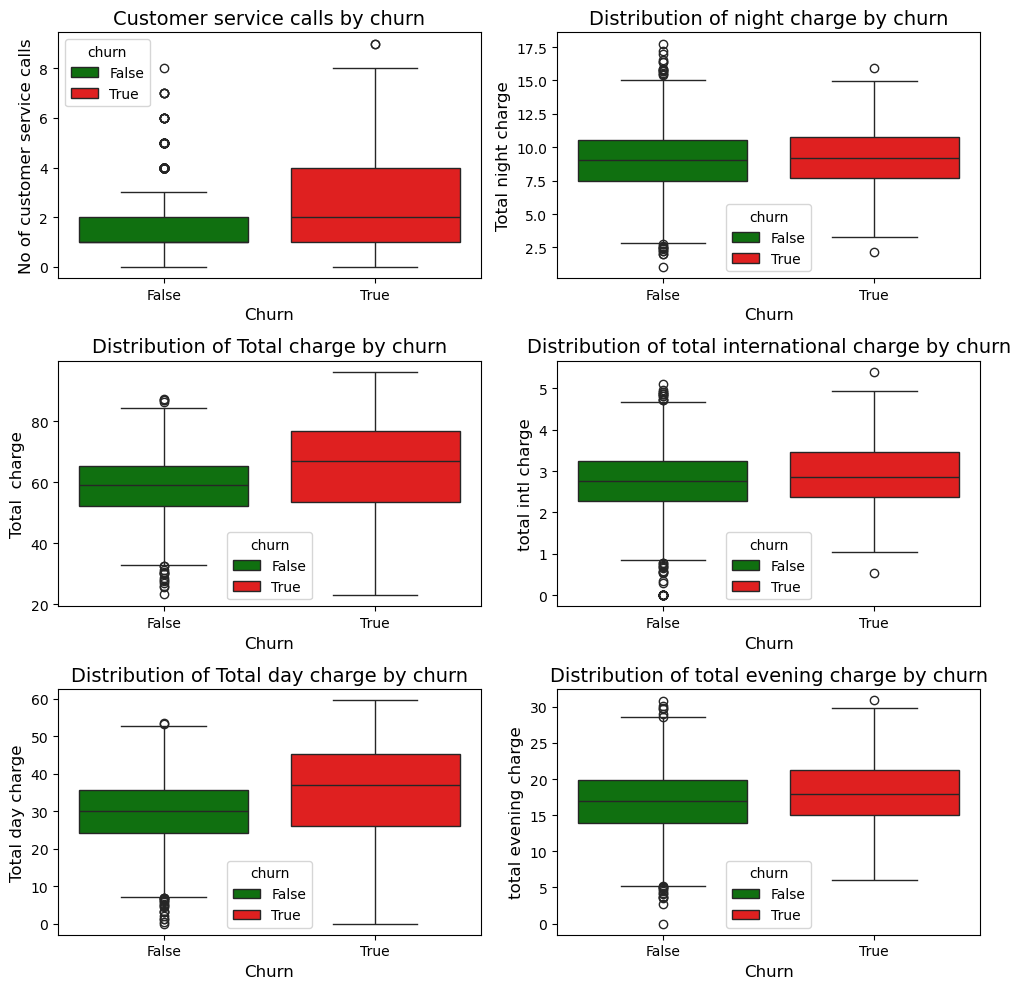

In [8]:
fig,axis=plt.subplots(3,2,figsize=(10,10))
sns.boxplot(x='churn', y='customer service calls', data=df, ax=axis[0, 0],hue='churn',palette={True:'red',False:'green'})
axis[0,0].set_title ('Customer service calls by churn',fontsize=14)
axis[0,0].set_xlabel('Churn',fontsize=12)
axis[0,0].set_ylabel('No of customer service calls',fontsize=12)


sns.boxplot(x='churn', y='total night charge', data=df, ax=axis[0, 1],hue='churn',palette={True:'red',False:'green'})
axis[0,1].set_title ('Distribution of night charge by churn',fontsize=14)
axis[0,1].set_xlabel('Churn',fontsize=12)
axis[0,1].set_ylabel('Total night charge',fontsize=12)

sns.boxplot(x='churn', y='total_charges', data=df, ax=axis[1, 0],hue='churn',palette={True:'red',False:'green'})
axis[1,0].set_title ('Distribution of Total charge by churn',fontsize=14)
axis[1,0].set_xlabel('Churn',fontsize=12)
axis[1,0].set_ylabel('Total  charge',fontsize=12)

sns.boxplot(x='churn', y='total day charge', data=df, ax=axis[2, 0],hue='churn',palette={True:'red',False:'green'})
axis[2,0].set_title ('Distribution of Total day charge by churn',fontsize=14)
axis[2,0].set_xlabel('Churn',fontsize=12)
axis[2,0].set_ylabel('Total day charge',fontsize=12)

sns.boxplot(x='churn', y='total eve charge', data=df, ax=axis[2, 1],hue='churn',palette={True:'red',False:'green'})
axis[2,1].set_title ('Distribution of total evening charge by churn',fontsize=14)
axis[2,1].set_xlabel('Churn',fontsize=12)
axis[2,1].set_ylabel('total evening charge',fontsize=12)


sns.boxplot(x='churn', y='total intl charge', data=df, ax=axis[1, 1],hue='churn',palette={True:'red',False:'green'})
axis[1,1].set_title ('Distribution of total international charge by churn',fontsize=14)
axis[1,1].set_xlabel('Churn',fontsize=12)
axis[1,1].set_ylabel('total intl charge',fontsize=12)


plt.tight_layout()
plt.show()

**We note that:**  
Customers who churned had received a higher customer service calls than those who remained.  
Customers who exited experienced similar night charges to those who remained. Night charges may not have a higher influence on churn.  
Churners were experienced relatively higher total charges than those who did not exit.  
Customers who exited experienced similar international charges to those who remained. International charges may not have a higher influence on churn.  
Churners experienced higher day time charges than non churners.  
Customers who exited experienced similar evening charges to those who remained. Evening charges may not have a higher influence on churn.





## 2.2 **Visualizing churn by products**

In [9]:
#Summary of churn churn and non churn by products:
#Summary by Intertnational plan:
int_churn_summary=df.groupby(['international plan','churn']).size().unstack(fill_value=0)
int_churn_summary.columns=['Remained','Churned']
#int_churn_summary
#Summary by Voice mail plan:
Voicemail_churn_summary=df.groupby(['voice mail plan','churn']).size().unstack(fill_value=0)
Voicemail_churn_summary.columns=['Remained','Churned']
#Voicemail_churn_summary



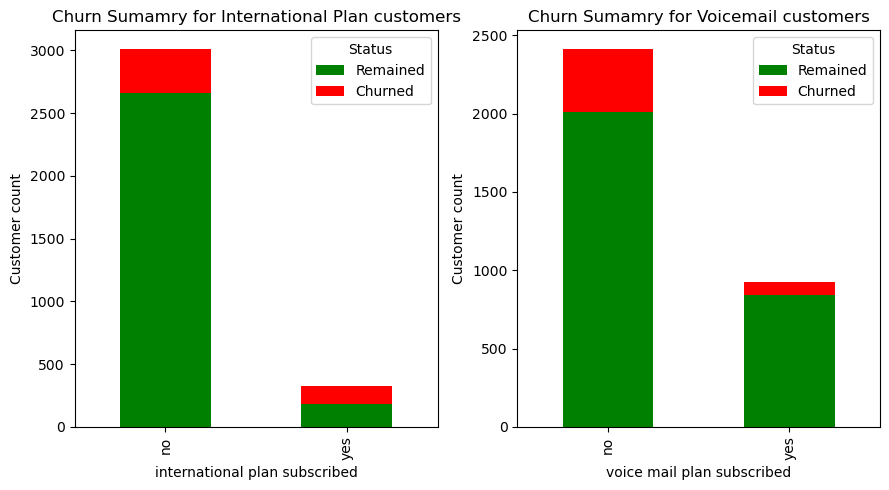

In [10]:
#plotting the summaries:
fig,axes=plt.subplots(1,2,figsize=(9,5))
int_churn_summary.plot(kind='bar',stacked=True,ax=axes[0],color=['green','red'],
                      title='Churn Sumamry for International Plan customers')
axes[0].set_xlabel('international plan subscribed')
axes[0].set_ylabel('Customer count')
axes[0].legend(title='Status')


Voicemail_churn_summary.plot(kind='bar',stacked=True,ax=axes[1],color=['green','red'],
                      title='Churn Sumamry for Voicemail customers')
axes[1].set_xlabel('voice mail plan subscribed')
axes[1].set_ylabel('Customer count')
axes[1].legend(title='Status')


plt.tight_layout()
plt.show()
                      

 **We note that:**  
Most customers were  not on international plan.  
In both international and non international plan, more customers were reatined compared to those that exited.  
There were less customers on voice mail plan compared to those that were not subscribed to voice mail plan.  
In both cases under voice mail plan , less customers exited.    

In [11]:
#Creating logistic model:
#Our Target  is  churn:
X=df.drop(['churn','phone number'],axis=1)#dropping target and phone number
y=df['churn']
#Splitting data to tain and test:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Encoding categorical features in the data using OHE:
encoder=OneHotEncoder(drop='first',sparse_output=False)
#Fititng and transforming training data:
X_train_encoded=encoder.fit_transform(X_train[['international plan','voice mail plan','state']])
X_train_encoded_df=pd.DataFrame(X_train_encoded,columns=encoder.get_feature_names_out(['international plan','voice mail plan','state']))
#X_train_encoded_df.head(2)
#Transforming the test data:
X_test_encoded=encoder.transform(X_test[['international plan','voice mail plan','state']])
X_test_encoded_df=pd.DataFrame(X_test_encoded,columns=encoder.get_feature_names_out(['international plan','voice mail plan','state']))

X_train_encoded_df.reset_index(drop=True,inplace=True)
#Dropping the categorical features after encoding:
X_train.drop(['international plan','voice mail plan','state'],axis=1,inplace=True)
X_test.drop(['international plan','voice mail plan','state'],axis=1,inplace=True)
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
#Combining the original with encoded data
X_train_final=pd.concat([X_train.reset_index(drop=True),X_train_encoded_df],axis=1)
X_test_final=pd.concat([X_test.reset_index(drop=True),X_test_encoded_df],axis=1)
    

# 3.0 **Modelling**:

## 3.1 **Base Logisting Regression  Modelling**:

In [12]:
#Model initializing:
model1=LogisticRegression(max_iter=7000,)

#Fitting triaing data in the model:
model1.fit(X_train_final,y_train)


LogisticRegression(max_iter=7000)

In [13]:
#Predicting using the base model:
y_pred_model1=model1.predict(X_test_final)

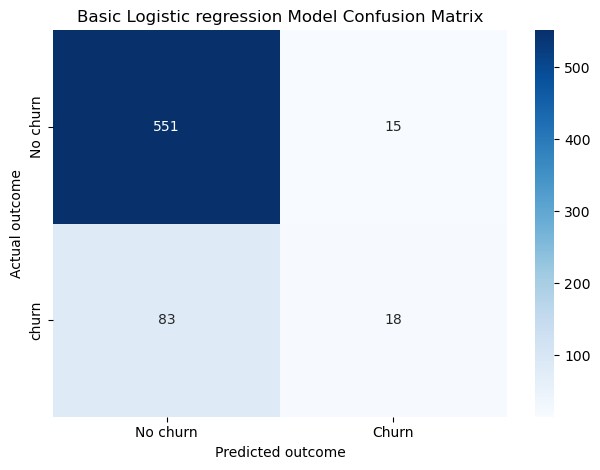

In [14]:
#Visualizing the confudion matrix of the outcome:
cm=confusion_matrix(y_test,y_pred_model1)
#plotting the cm
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No churn','Churn'], yticklabels=['No churn','churn'])
plt.title('Basic Logistic regression Model Confusion Matrix')
plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.tight_layout()
plt.show()

**We note that**:  
The model precicted 18 chruners correctly.  
It also predicted  551 non churners correctly.  
It predcted that 83 customers would not chrun but they actulaly churned.  
It predicted that 15 customers would churn but they did not churn.  

In [15]:
#Visualizing the ROC curve:
#Computing probabilities:
y_prob_model1=model1.predict_proba(X_test_final)[:,1]

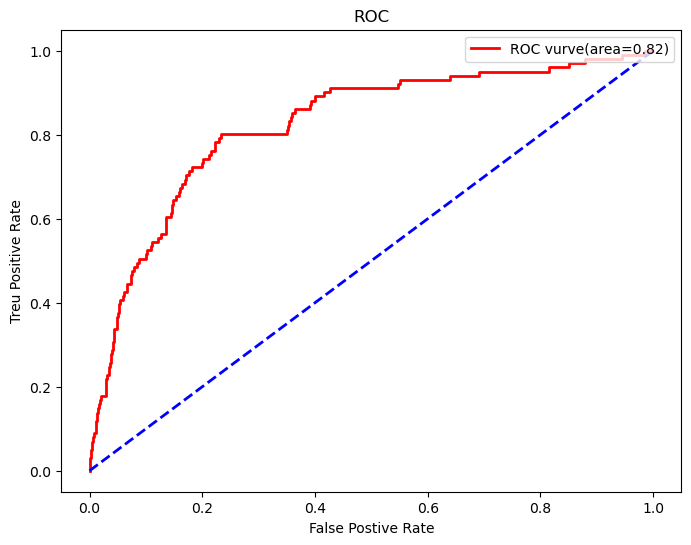

In [16]:
#ROC curve visulaization:
fpr,tpr,thresholds=roc_curve(y_test,y_prob_model1)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='red',lw=2,label=f'ROC vurve(area={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.xlabel('False Postive Rate')
plt.ylabel('Treu Positive Rate')
plt.title('ROC')
plt.legend(loc='upper right')
plt.show()

In [17]:
#Base model classification report
report_model1=classification_report(y_test,y_pred_model1)
print(f"Basic Logistic Regression Model Confusion Matrix report:\n{report_model1}")

Basic Logistic Regression Model Confusion Matrix report:
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.55      0.18      0.27       101

    accuracy                           0.85       667
   macro avg       0.71      0.58      0.59       667
weighted avg       0.82      0.85      0.82       667



The model was 85% accurate.  
The model is  correct 87% of the time in predicting non churners .  
It has a lower capacity to correctly predict churners since it is only accurate 55% of the time.  
Of all the customers who churned, the model only predicted 18%.  
The base model has thus scored poorly on its ability to be relied upon by the compnay to correctly predict churners.  
The modle has a higher F1 score of 92% in predicitg non churners.  
It is not performing well when predicting  churners for the company to use.

The model has a good ability to distinguish between churners and non churners at AUC value of 0.82

**The model has not met our succses criteria. It not suitable but needs improvements**.

## 3.1 **Improved Logisting Regression  Modelling**:

In [18]:
# checking the disbribution of customers by churn
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

The data has class imbalance.It has less churners.  
To improve the model we  will adopt SMOTE  method to handle class imbalances.  
We shall also apply standardization of the data using standard scaler

In [19]:
# Scaling and transforming the data:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_final)
X_test_scaled=scaler.transform(X_test_final)

In [20]:
#applying SMOTE on training data:
smote=SMOTE(random_state=42)
X_train_bal,y_train_bal=smote.fit_resample(X_train_scaled,y_train)

In [21]:
#training the model after balancing the data:
model2=LogisticRegression()
model2.fit(X_train_bal,y_train_bal)

LogisticRegression()

In [22]:
#Predicting:
y_pred_model2=model2.predict(X_test_scaled)


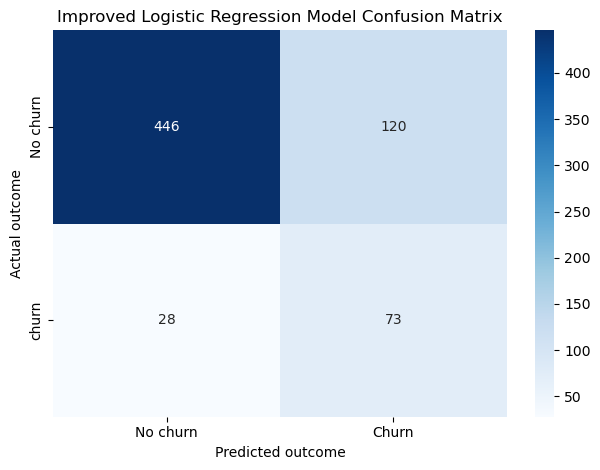

In [23]:
#Visualizing the confusion matrix of the model2:
cm=confusion_matrix(y_test,y_pred_model2)
#plotting the cm
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No churn','Churn'], yticklabels=['No churn','churn'])
plt.title('Improved Logistic Regression Model Confusion Matrix')
plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.tight_layout()
plt.show()

**Improved model has correctly predicted 73 churners and 446 non churners**.

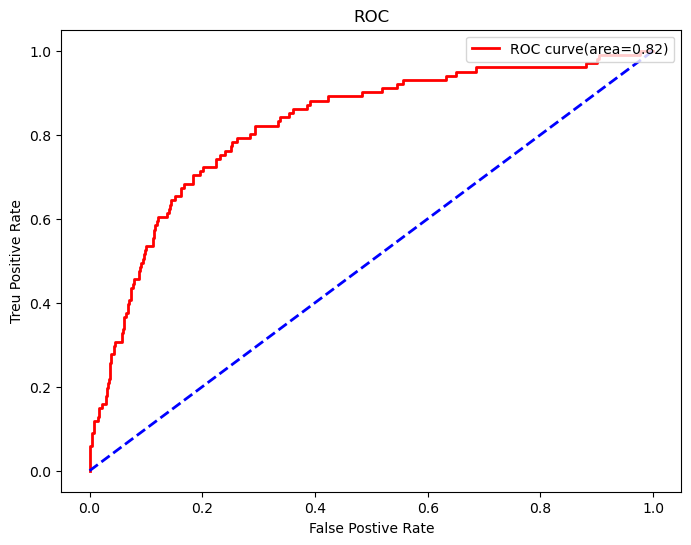

In [24]:
#Visualizing the ROC curve of the improved Logistic Regression model
#Computing probabilities:
y_prob_model2=model2.predict_proba(X_test_scaled)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob_model2)
roc_auc2=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='red',lw=2,label=f'ROC curve(area={roc_auc2:.2f})')
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.xlabel('False Postive Rate')
plt.ylabel('Treu Positive Rate')
plt.title('ROC')
plt.legend(loc='upper right')
plt.show()

The model still has a good ability to distnguish between churners and non churners at AUC value of 0.82

In [25]:
#model 2 perfromance evalaution:
report_model2=classification_report(y_test,y_pred_model2)
#classification report:
print(f"Improved Logistic Regression Model Confusion Matrix report:\n{report_model2}")

Improved Logistic Regression Model Confusion Matrix report:
              precision    recall  f1-score   support

       False       0.94      0.79      0.86       566
        True       0.38      0.72      0.50       101

    accuracy                           0.78       667
   macro avg       0.66      0.76      0.68       667
weighted avg       0.86      0.78      0.80       667



Overall accuracy had declined to 78% from 85% in the base model.  
The accuracy in predicting non churners has declined to 79% from 87% in the base model.   
The ability to correctly predict churners has improved to 72% from 18%.  
The f1 score has in predicting churners has improved to 50% from 27% in the base model.  
Overall the standardised model has performed better in predicting churners than the base model.  

**The model has not met our threshold of 85% on recall and f1 score**

## 3.1 **Base Decision Tree  Modelling**:

In [26]:
#initiating the model:
model3=DecisionTreeClassifier(random_state=42)
model3.fit(X_train_final,y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
#predicting using the model:
y_pred_model3=model3.predict(X_test_final)

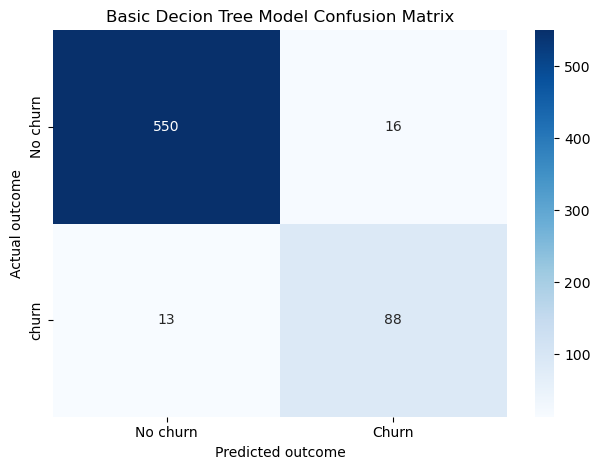

In [28]:
#Visualizing the confusion matrix of the model3:
cm=confusion_matrix(y_test,y_pred_model3)
#plotting the cm
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No churn','Churn'], yticklabels=['No churn','churn'])
plt.title('Basic Decion Tree Model Confusion Matrix')
plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.tight_layout()
plt.show()

The model has correctly predicted 88 churners.  
It has correctly predicted 550 non churners.

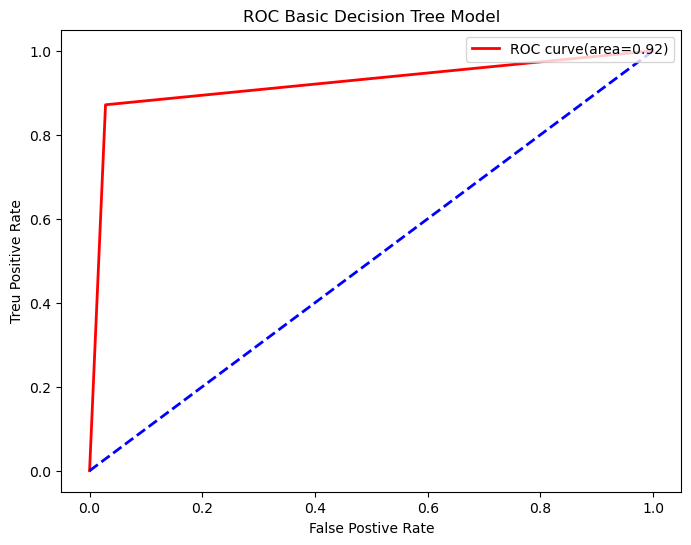

In [29]:
#Visualizing the ROC curve of the base decisionTree:
#Computing probabilities:
y_prob_model3=model3.predict_proba(X_test_final)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob_model3)
roc_auc2=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='red',lw=2,label=f'ROC curve(area={roc_auc2:.2f})')
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.xlabel('False Postive Rate')
plt.ylabel('Treu Positive Rate')
plt.title('ROC Basic Decision Tree Model')
plt.legend(loc='upper right')
plt.show()

Based on the AUC value of 0.92. the model shows a very stong ability to distinguish between churners and non churners.

In [30]:
#evaluating the model performance
report_model3=classification_report(y_test,y_pred_model3)
print(report_model3)

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       566
        True       0.85      0.87      0.86       101

    accuracy                           0.96       667
   macro avg       0.91      0.92      0.92       667
weighted avg       0.96      0.96      0.96       667



Overall accuracy has improved to 96% compared to 78% in the improved regression model and 85% in the base regression model.   
The accuracy in predicting non churners has inceased to 98%.  
The ability to correctly predict churners has improved 87% compared to 72% in improved Regression model and  18% in base regression model.  
The f1 score has in predicting churners has improved to 87% compared to 50% in improved regression model and 27% in the base model.  
 Overall the base decion tree model  has a higher value to the compnay than both of the logistic regression models in predicting customer churn.  

**The model has  met both our recall and f1 scores hence it is suitable for our churn prediction**

## 3.2 Improved Decision Tree  Modelling:

In theis case the model has been enahnced to select the best parameters using gridsearch to tune.

In [31]:
#setting out the grid:
param_grid={'max_depth':[None,2,5,8,10],
            'min_samples_split':[2,5,6,10],
            'min_samples_leaf':[1,2,4,6],
            'max_features':[None,1,2,3,4],
            'criterion':['gini','entropy']}


In [32]:
#Initailizing the improved model:
model4=DecisionTreeClassifier(random_state=42)
grid_search=GridSearchCV(estimator=model4,param_grid=param_grid,cv=5,scoring='recall_macro',n_jobs=-1,verbose=1)

In [33]:
#fitting the model:
grid_search.fit(X_train_final,y_train)


Fitting 5 folds for each of 800 candidates, totalling 4000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 8, 10],
                         'max_features': [None, 1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 6, 10]},
             scoring='recall_macro', verbose=1)

In [34]:
best_model=grid_search.best_estimator_
y_pred_best=best_model.predict(X_test_final)


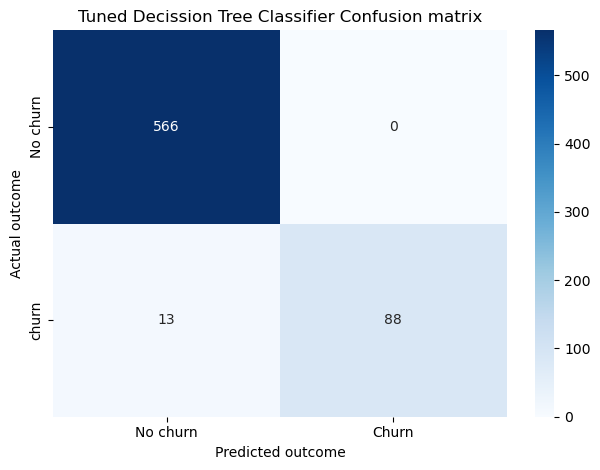

In [35]:
#Visualizing the confusion matrix:
cm=confusion_matrix(y_test,y_pred_best)
#plotting the cm
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['No churn','Churn'], yticklabels=['No churn','churn'])
plt.title('Tuned Decission Tree Classifier Confusion matrix')
plt.xlabel('Predicted outcome')
plt.ylabel('Actual outcome')
plt.tight_layout()
plt.show()

The model has correctly predicted 88churners.  
The model has correclty predicted 566 non churners.

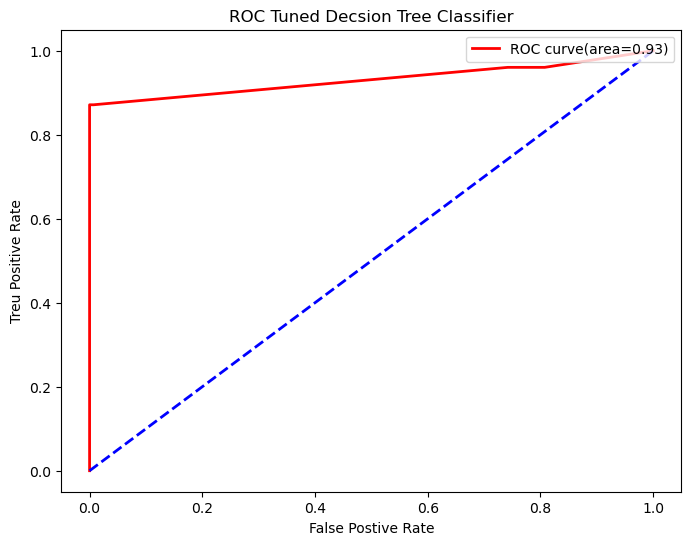

In [36]:
#Visualizing the ROC curve of the improved decisionTree:
#Computing probabilities:
y_prob_model4=best_model.predict_proba(X_test_final)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob_model4)
roc_auc2=auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='red',lw=2,label=f'ROC curve(area={roc_auc2:.2f})')
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.xlabel('False Postive Rate')
plt.ylabel('Treu Positive Rate')
plt.title('ROC Tuned Decsion Tree Classifier')
plt.legend(loc='upper right')
plt.show()

The AUC has increased to 0.94 meaning the model is very strong in distingushing churners and non churners.

In [37]:
#classification report:
report_model4 = classification_report(y_test, y_pred_best)
print(f"Tuned Decision Tree Classifier Confusion Matrix report:\n{report_model4}")



Tuned Decision Tree Classifier Confusion Matrix report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       566
        True       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



Overall accuracy has improved to 98% the highest among all the four models.
 
The accuracy in predicting non churners has inceased to 100%.  
The ability to correctly predict churners has remained at  87% similar to the base decision tree model which was higher than both regression models.  
F1 score in predicting churners has imporoved to 83%, the highest of the four models.  


**Overall the improved decion tree model has the highest utlity to the company**.

# 4.0 **Recomendations and way foward**:

We recommend that the company adopts the improved decision tree classifier model to predict the churn.  
The management should take not that there will be **7% risk** that true churnners will  not be detected by the model.  
The company undertakes a business impact analysis of the  7% risk to evalaute  further investments needed to improve the model.  
With new discoveries on the customer profiles, continued enhancmeent of the model can be done to improve its utility.